In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Display all the columns no matter how many
pd.pandas.set_option("display.max_columns", None)

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ingest

In [3]:
# Inges the dataset
house = pd.read_csv('dataset/train.csv', index_col='Id')
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Basic exploration

In [4]:
house.shape

(1460, 80)

In [5]:
# house.info()

That is quit a lot. Lets use heatmap

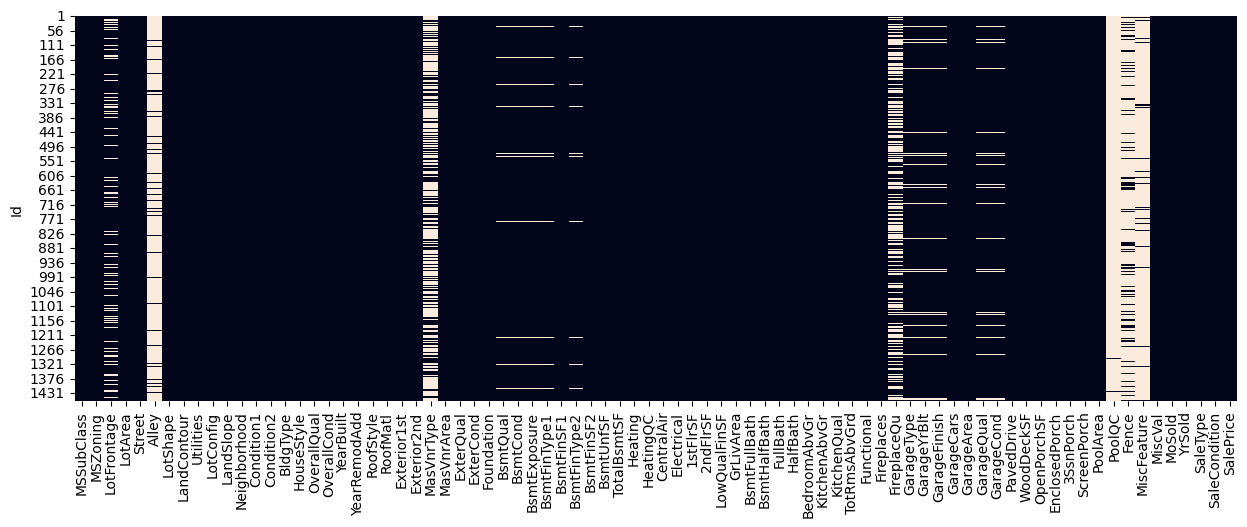

In [6]:
plt.figure(figsize=(15, 5))
sns.heatmap(house.isnull(), cbar=False);

Observation: Some columns have lots of missing features e.g MSZoning, Alley, MasVnrType, FireplaceQu, PoolQC, Fence, MiscFeature

In [7]:
from helper_functions import missing_data

In [8]:
# Checking missing data
missing_data(house, show_all=False)

,Total missing values,Percent,dtype
LotFrontage,259,17.739726,float64
Alley,1369,93.767123,object
MasVnrType,872,59.726027,object
MasVnrArea,8,0.547945,float64
BsmtQual,37,2.534247,object
BsmtCond,37,2.534247,object
BsmtExposure,38,2.602740,object
BsmtFinType1,37,2.534247,object
BsmtFinType2,38,2.602740,object
Electrical,1,0.068493,object


For a dataset that has 1460 columns, some houses contain way too many missing values.

I also notice that some columns might not be reported to represent an absence.
e.g PoolQC - Pool Quality, Garage, Basement, MiscFeature

In [9]:
# Split the dataset into train, and validation set. We dont want insights from X_train to spill into the validation set
X_train, X_val = train_test_split(house, test_size=0.2, stratify=house['Neighborhood'], shuffle=True, random_state=42)

In [10]:
X_train.shape, X_val.shape

((1168, 80), (292, 80))

NOTE  
I stratified the dataset by the Neighborhood columns to make sure that all the neighborhoods are well represented

Basic data checking

In [11]:
from helper_functions import find_constant_columns

In [12]:
# Look for columns that contian missing values
find_constant_columns(X_train)

[]

Observation: There are no columns that contain constant values

In [13]:
## Some numeric columns are categoricals
def numeric_to_categorical(df):
    cat_feats = ["MSSubClass", "OverallCond", "OverallQual", "MoSold"]
    df[cat_feats] = df[cat_feats].astype(object)
    return df

In [14]:
# Convert to categoricals
X_train = numeric_to_categorical(X_train)

In [15]:
# Confirm
for i in ["MSSubClass", "OverallCond", "OverallQual", "MoSold"]:
    assert X_train[i].dtype == 'object', "i is not of object dtype"

NOTE  
It is important to note that these columns were converted to categoricals after i studied them below.   
I decided that it makes sense to perform the transformation earlier.

In [16]:
### Get all imbalanced columns
from helper_functions import get_highly_imbalanced_columns

In [17]:
# Colums that have more than 95% of one value
imbs = get_highly_imbalanced_columns(X_train, 0.95)
print(len(imbs))
imbs

13


['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'LowQualFinSF',
 'KitchenAbvGr',
 'GarageQual',
 'GarageCond',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

In [18]:
# function to drop imbalanced columns
def drop_imbalanced_cols(df):
    df = df.drop(columns=imbs)
    print(f"The following columns were dropped: {imbs}")
    return df

In [19]:
len(X_train.columns)

80

In [20]:
X_train = drop_imbalanced_cols(X_train)

The following columns were dropped: ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', 'GarageQual', 'GarageCond', '3SsnPorch', 'PoolArea', 'MiscVal']


In [21]:
len(X_train.columns)

67

Observation:
+ The dataset is quite large to analyze.
+ I will split the data into numeric and categoricals to make exploration easier

In [22]:
# Object dtypes will be called cateoricals
num_df = X_train.select_dtypes(include=['number'])
cat_df = X_train.select_dtypes(include=['object'])

num_df.shape, cat_df.shape

((1168, 28), (1168, 39))

# numeric columns

In [23]:
num_df.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
977,51.0,5900,1923,1958,0.0,0,0,440,440,869,0,869,0,0,1,0,2,4,0,NaN,0,0,0,0,0,0,2006,85500
131,88.0,14200,1966,1966,309.0,445,0,479,924,1216,941,2157,0,0,2,1,4,8,2,1966.0,2,487,105,66,0,0,2006,226000


In [24]:
num_df.shape

(1168, 28)

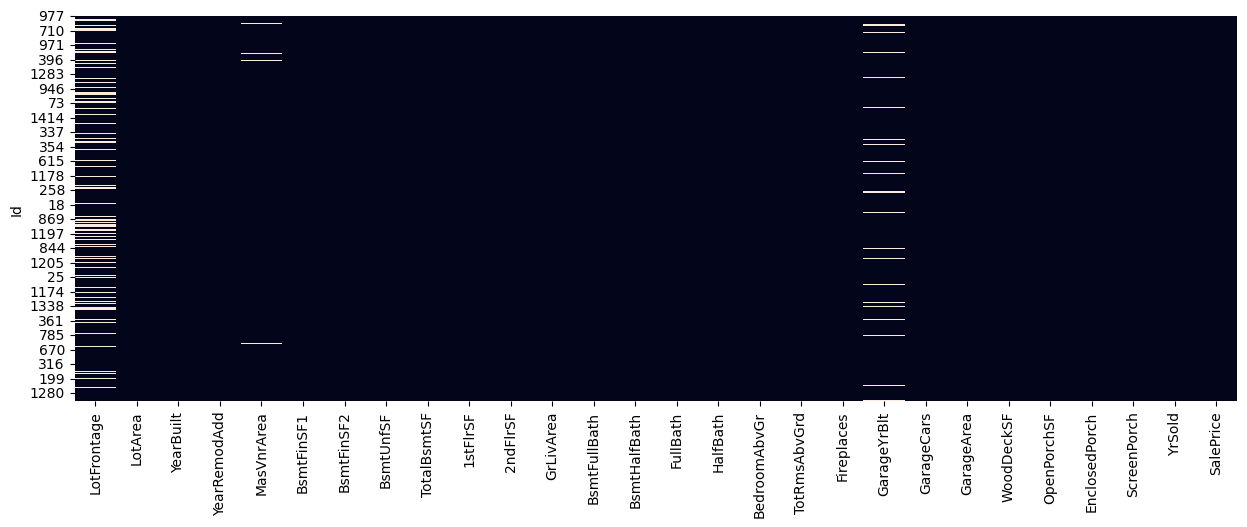

In [25]:
# Missing values heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(num_df.isnull(), cbar=False);

In [26]:
missing_data(num_df, show_all=False)

,Total missing values,Percent,dtype
LotFrontage,211,18.065068,float64
MasVnrArea,8,0.684932,float64
GarageYrBlt,63,5.393836,float64


Observation: Only 3 columns have numeric values

In [27]:
# Check for unique values in the dataframe
from helper_functions import unique_values

In [28]:
unique_values(num_df, max_colwidth=80)

,Total,Uniques,Values
BsmtHalfBath,1168,3,"[[0, 1, 2]]"
HalfBath,1168,3,"[[0, 1, 2]]"
Fireplaces,1168,4,"[[0, 2, 1, 3]]"
FullBath,1168,4,"[[1, 2, 0, 3]]"
BsmtFullBath,1168,4,"[[0, 1, 2, 3]]"
GarageCars,1168,5,"[[0, 2, 1, 3, 4]]"
YrSold,1168,5,"[[2006, 2009, 2007, 2008, 2010]]"
BedroomAbvGr,1168,7,"[[2, 4, 3, 1, 5, 0, 6]]"
TotRmsAbvGrd,1168,11,"[[4, 8, 6, 7, 5, 9, 10, 3, 11, 2, 12]]"
ScreenPorch,1168,61,"[[0, 170, 200, 120, 100, 163, 185, 216, 312, 168, 224, 142, 182, 276, 288, 2..."


NOTE  
MSSubclass, OverallCond, OverallQual, MoSold. were determined to be categorical. So they were converted to categorical columns above

#### Explore the target column

In [29]:
from helper_functions import mini_describe

In [30]:
# Create a dataframe with the sale price column for exploration purposes
saleprice_df = num_df.loc[:, ["SalePrice"]]

In [31]:
# Get numeric description
mini_describe(saleprice_df, "SalePrice")

,count,mean,std,min,25%,50%,75%,max,Range,IQR
SalePrice,1168.0,181100.552226,80998.216728,34900.0,129500.0,163000.0,214600.0,755000.0,720100.0,85100.0


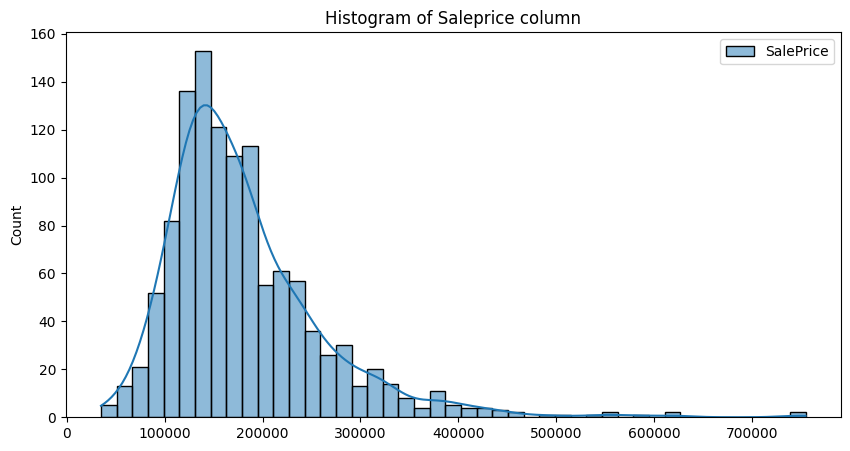

In [32]:
plt.figure(figsize=(10, 5))
sns.histplot(saleprice_df, kde=True)
plt.title("Histogram of Saleprice column");

+ Skewed to the right
+ unimodal
+ centered at about 163_000
+ Minimum house price is 34_900
+ Maximum house price is 7555_000. That is very much considering that the 75 percentile price is at 214,600

In [33]:
# How many in the X_train data are more costly than 500_000
len(saleprice_df[saleprice_df.SalePrice > 500000])

9

Only 9. 

I believe that attempting to remove these outlier houses will be detrimental. 
Those kinds of houses will be in the vaidation set as well as the test set

We should attempt to normalize this column and see whether it becomes more normal

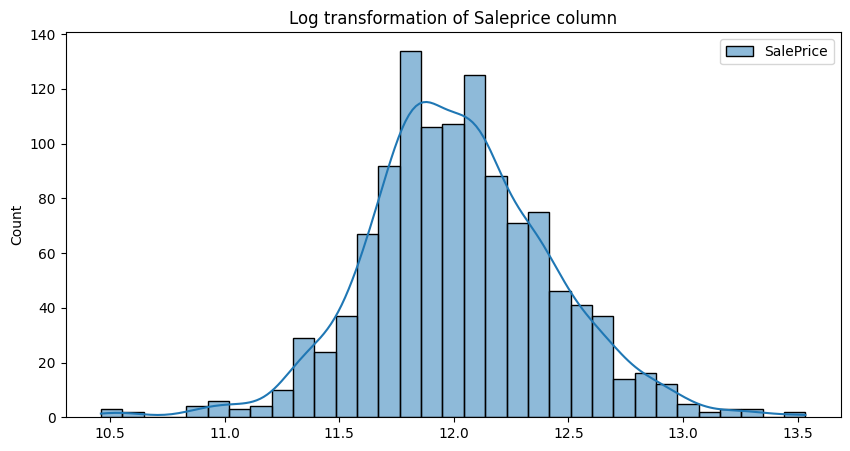

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(saleprice_df), kde=True)
plt.title("Log transformation of Saleprice column");

The log transformation seems to make it better.
Although there seems to be some outliers more at the left than the right

####  Explore year features

Let's see what we can extract from those variables

In [35]:
# Check for columns which have "Yr" or "Year in them
year_features = [feat for feat in num_df.columns if "Yr" in feat or "Year" in feat]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [36]:
# Create a dataframe to explore the year features
years = num_df.loc[:, year_features]
years.head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
Id,,,,
977,1923,1958,NaN,2006
131,1966,1966,1966.0,2006
342,1950,1950,1950.0,2009
1107,1990,1991,1990.0,2007
1325,2006,2007,2007.0,2007


Idea
+ Create a new feature "Age" i.e Difference betwen Year sold and Year built
+ Calculate the difference between all other year variables and YrSold
+ Check if they have a relationship with the sale price of the house

In [37]:
# Add new columns
def add_age(df):
    df["Age"]=df["YrSold"] - df["YearBuilt"]
    df["RemodAddAge"]=df["YrSold"] - df["YearRemodAdd"]
    df["GrgAge"]=df["YrSold"] - df["GarageYrBlt"]
    return df

In [38]:
years = add_age(years)
years.describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,Age,RemodAddAge,GrgAge
count,1168.000000,1168.000000,1105.000000,1168.000000,1168.000000,1168.000000,1105.000000
mean,1971.002568,1984.851027,1978.161991,2007.853596,36.851027,23.002568,29.691403
std,30.259078,20.644709,24.855233,1.321487,30.317826,20.626083,24.893937
min,1872.000000,1950.000000,1900.000000,2006.000000,0.000000,0.000000,0.000000
25%,1954.000000,1967.000000,1961.000000,2007.000000,8.000000,4.000000,7.000000
50%,1972.000000,1994.000000,1979.000000,2008.000000,35.000000,14.000000,28.000000
75%,2000.000000,2004.000000,2002.000000,2009.000000,55.000000,41.000000,47.000000
max,2010.000000,2010.000000,2010.000000,2010.000000,136.000000,60.000000,107.000000


Observation: 
All the houses were sold between 2006 till 2010
75% of the houses were builg before 2000
There does not seem to be any signs of inconsistent entries

Task: Check the relationship with the target column -- use scatter plot

In [39]:
# Add a column for the target
years["SalePrice"] = num_df.loc[:, "SalePrice"]

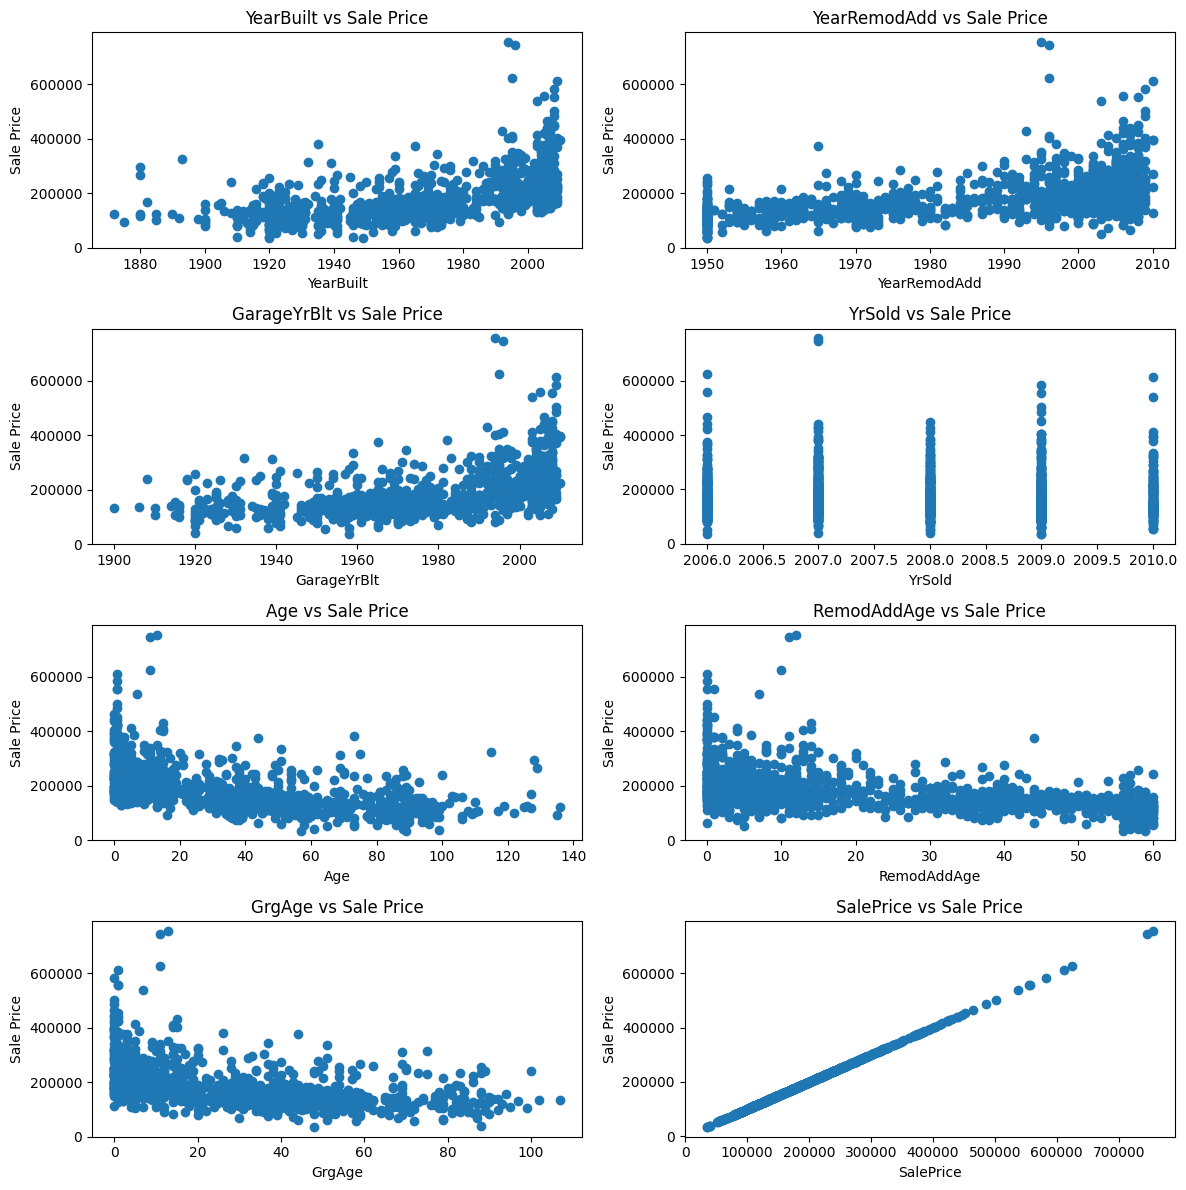

In [40]:
# Scatter plot
plots_per_line = 2

num_plots = len(years.columns) - 1
num_rows = (num_plots + plots_per_line - 1) // plots_per_line

fig, axs = plt.subplots(num_rows, plots_per_line, figsize = (12, 3 * num_rows))

axs = axs.flatten() if num_rows > 1 else [axs]

for i, col in enumerate(years.columns[:]):
    row_index = i // plots_per_line
    col_index = i % plots_per_line
    axs[i].scatter(years[col], years["SalePrice"])
    axs[i].set_title(f"{col} vs Sale Price")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Sale Price")

plt.tight_layout()
plt.show();

Observation
+ There's a downtrend that suggest that the older a house, the lesser its price. This makes sense.
+ Obviously thats the general trend but its not too strong
+ But newer houses seem to be reflectiong higher prices

Task: Drop all the year columns. They seem to be reflecting the same thing as their Age

`Idea`: Instead of stating age, How about you bucketize the years and use that instead??????????????????
It makes sense to determine that the price depends on when the house was built. 
But i believe that representing that information with age(i.e Year sold - Year built) will hide alot of useful information.

In [41]:
# Drop the year column
def drop_years(df):
    df = df.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'])
    return df

In [42]:
years = drop_years(years)
years.columns, years.shape

(Index(['Age', 'RemodAddAge', 'GrgAge', 'SalePrice'], dtype='object'),
 (1168, 4))

#### Explore features that involve Counts

In [43]:
# unique_values(num_df)

All numeric features that involves some kind of count

In [44]:
count_features = [
    "HalfBath", "BsmtHalfBath", "BsmtFullBath",
    "FullBath", "Fireplaces",
    "GarageCars", "BedroomAbvGr", "TotRmsAbvGrd"]

In [45]:
# Create a dataframe with those features
counts = num_df.loc[:, count_features]
counts.head()

,HalfBath,BsmtHalfBath,BsmtFullBath,FullBath,Fireplaces,GarageCars,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,,
977,0,0,0,1,0,0,2,4
131,1,0,0,2,2,2,4,8
342,0,0,0,1,0,1,2,4
1107,0,0,1,2,1,2,3,6
1325,0,0,0,2,1,3,2,7


In [46]:
# Cehck form missing values
counts.isnull().sum()[counts.isnull().sum() > 0]

Series([], dtype: int64)

<Axes: xlabel='HalfBath', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for HalfBath')

Text(0.0, 730.1, '62.50%')

Text(1.0, 428.1, '36.64%')

Text(2.0, 10.1, '0.86%')

<Axes: xlabel='BsmtHalfBath', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for BsmtHalfBath')

Text(0.0, 1099.1, '94.09%')

Text(1.0, 67.1, '5.74%')

Text(2.0, 2.1, '0.17%')

<Axes: xlabel='BsmtFullBath', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for BsmtFullBath')

Text(0.0, 685.1, '58.65%')

Text(1.0, 472.1, '40.41%')

Text(2.0, 10.1, '0.86%')

Text(3.0, 1.1, '0.09%')

<Axes: xlabel='FullBath', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for FullBath')

Text(0.0, 7.1, '0.60%')

Text(1.0, 517.1, '44.26%')

Text(2.0, 614.1, '52.57%')

Text(3.0, 30.1, '2.57%')

<Axes: xlabel='Fireplaces', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for Fireplaces')

Text(0.0, 542.1, '46.40%')

Text(1.0, 524.1, '44.86%')

Text(2.0, 99.1, '8.48%')

Text(3.0, 3.1, '0.26%')

<Axes: xlabel='GarageCars', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for GarageCars')

Text(0.0, 63.1, '5.39%')

Text(1.0, 296.1, '25.34%')

Text(2.0, 657.1, '56.25%')

Text(3.0, 148.1, '12.67%')

Text(4.0, 4.1, '0.34%')

<Axes: xlabel='BedroomAbvGr', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for BedroomAbvGr')

Text(0.0, 4.1, '0.34%')

Text(1.0, 39.1, '3.34%')

Text(2.0, 287.1, '24.57%')

Text(3.0, 649.1, '55.57%')

Text(4.0, 165.1, '14.13%')

Text(5.0, 17.1, '1.46%')

Text(6.0, 7.1, '0.60%')

<Axes: xlabel='TotRmsAbvGrd', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for TotRmsAbvGrd')

Text(0.0, 1.1, '0.09%')

Text(1.0, 14.1, '1.20%')

Text(2.0, 79.1, '6.76%')

Text(3.0, 225.1, '19.26%')

Text(4.0, 313.1, '26.80%')

Text(5.0, 272.1, '23.29%')

Text(6.0, 145.1, '12.41%')

Text(7.0, 58.1, '4.97%')

Text(8.0, 37.1, '3.17%')

Text(9.0, 15.1, '1.28%')

Text(10.0, 9.1, '0.77%')

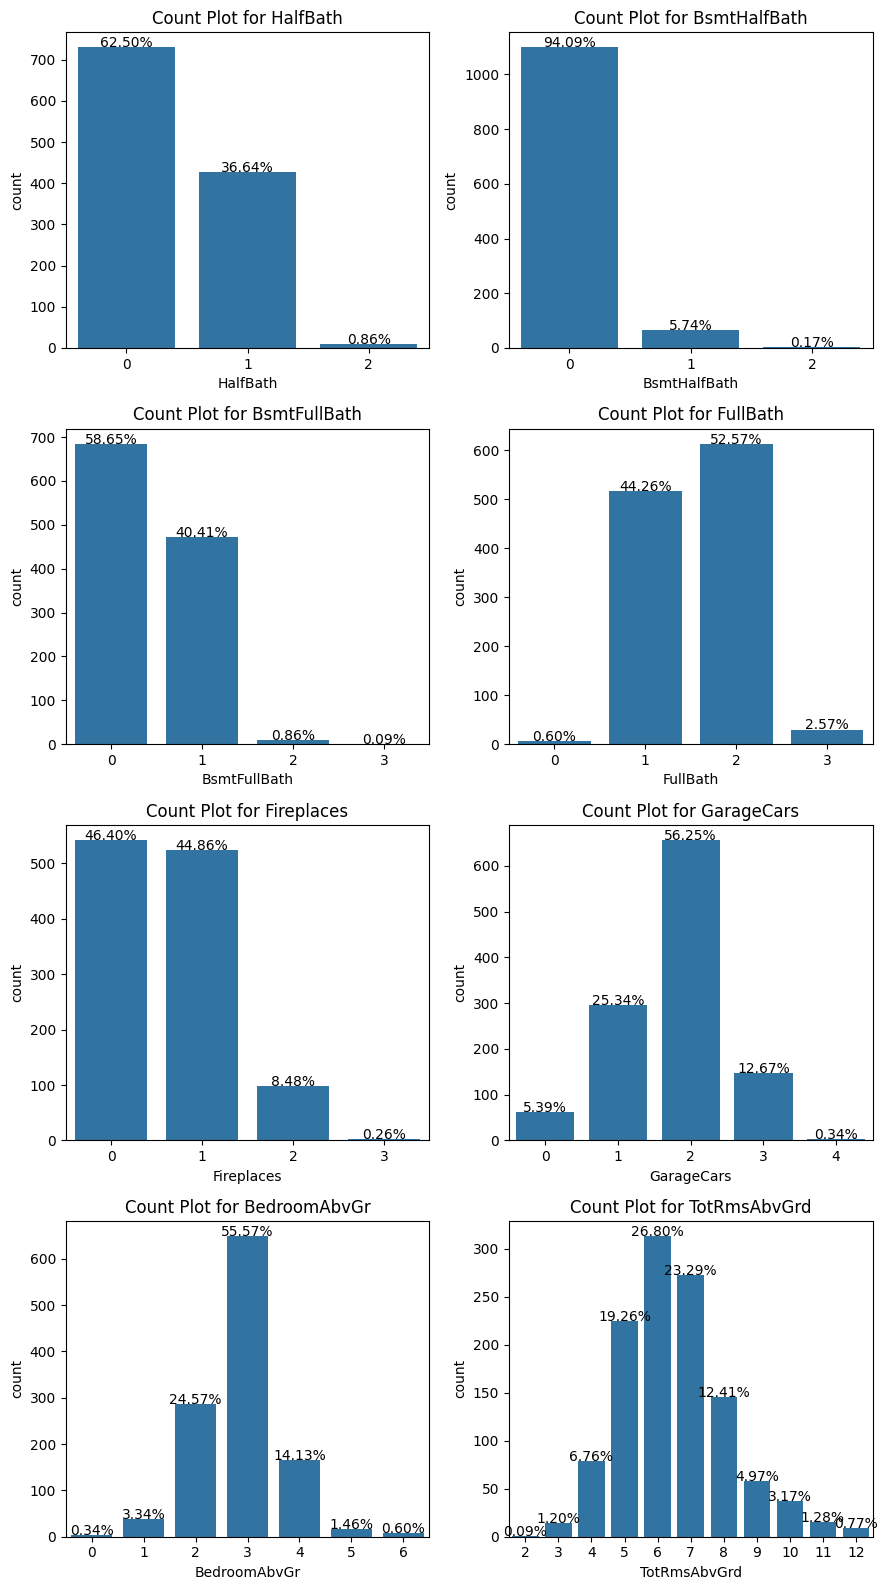

In [47]:
# Count plot
total_rows = len(counts)
percentages = (counts.value_counts() / total_rows) * 100

# Plot count plots with percentages
num_count_cols = len(counts.columns)
fig, axs = plt.subplots(nrows=(num_count_cols + 1) // 2, ncols=2, figsize=(9, 4 * ((num_count_cols + 1) // 2)))

for i, col in enumerate(counts.columns):
    ax = axs[i // 2, i % 2]
    sns.countplot(x=col, data=counts, ax=ax)
    ax.set_title(f'Count Plot for {col}')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height / total_rows * 100:.2f}%', ha='center')

plt.tight_layout()
plt.show()

Some columns are too skewed e.g BsmtHalfBath

In [48]:
def drop_skewed_counts(df):
    df = df.drop(columns=["BsmtHalfBath"])
    return df

In [49]:
print(len(counts.columns))
counts = drop_skewed_counts(counts)
len(counts.columns)

8


7

In [50]:
# Add the dependent feature to the dataframe
counts["SalePrice"] = num_df.loc[:, "SalePrice"]
counts.head()

,HalfBath,BsmtFullBath,FullBath,Fireplaces,GarageCars,BedroomAbvGr,TotRmsAbvGrd,SalePrice
Id,,,,,,,,
977,0,0,1,0,0,2,4,85500
131,1,0,2,2,2,4,8,226000
342,0,0,1,0,1,2,4,82000
1107,0,1,2,1,2,3,6,179900
1325,0,0,2,1,3,2,7,147000


In [51]:
# Get the name of the features
box_cols = [feat for feat in counts.columns if feat != "SalePrice"]
box_cols

['HalfBath',
 'BsmtFullBath',
 'FullBath',
 'Fireplaces',
 'GarageCars',
 'BedroomAbvGr',
 'TotRmsAbvGrd']

<Axes: xlabel='HalfBath', ylabel='SalePrice'>

Text(0.5, 1.0, 'Box Plot: HalfBath vs. Saleprice')

Text(0.5, 0, 'HalfBath')

Text(0, 0.5, 'SalePrice')

<Axes: xlabel='BsmtFullBath', ylabel='SalePrice'>

Text(0.5, 1.0, 'Box Plot: BsmtFullBath vs. Saleprice')

Text(0.5, 0, 'BsmtFullBath')

Text(0, 0.5, 'SalePrice')

<Axes: xlabel='FullBath', ylabel='SalePrice'>

Text(0.5, 1.0, 'Box Plot: FullBath vs. Saleprice')

Text(0.5, 0, 'FullBath')

Text(0, 0.5, 'SalePrice')

<Axes: xlabel='Fireplaces', ylabel='SalePrice'>

Text(0.5, 1.0, 'Box Plot: Fireplaces vs. Saleprice')

Text(0.5, 0, 'Fireplaces')

Text(0, 0.5, 'SalePrice')

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

Text(0.5, 1.0, 'Box Plot: GarageCars vs. Saleprice')

Text(0.5, 0, 'GarageCars')

Text(0, 0.5, 'SalePrice')

<Axes: xlabel='BedroomAbvGr', ylabel='SalePrice'>

Text(0.5, 1.0, 'Box Plot: BedroomAbvGr vs. Saleprice')

Text(0.5, 0, 'BedroomAbvGr')

Text(0, 0.5, 'SalePrice')

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

Text(0.5, 1.0, 'Box Plot: TotRmsAbvGrd vs. Saleprice')

Text(0.5, 0, 'TotRmsAbvGrd')

Text(0, 0.5, 'SalePrice')

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

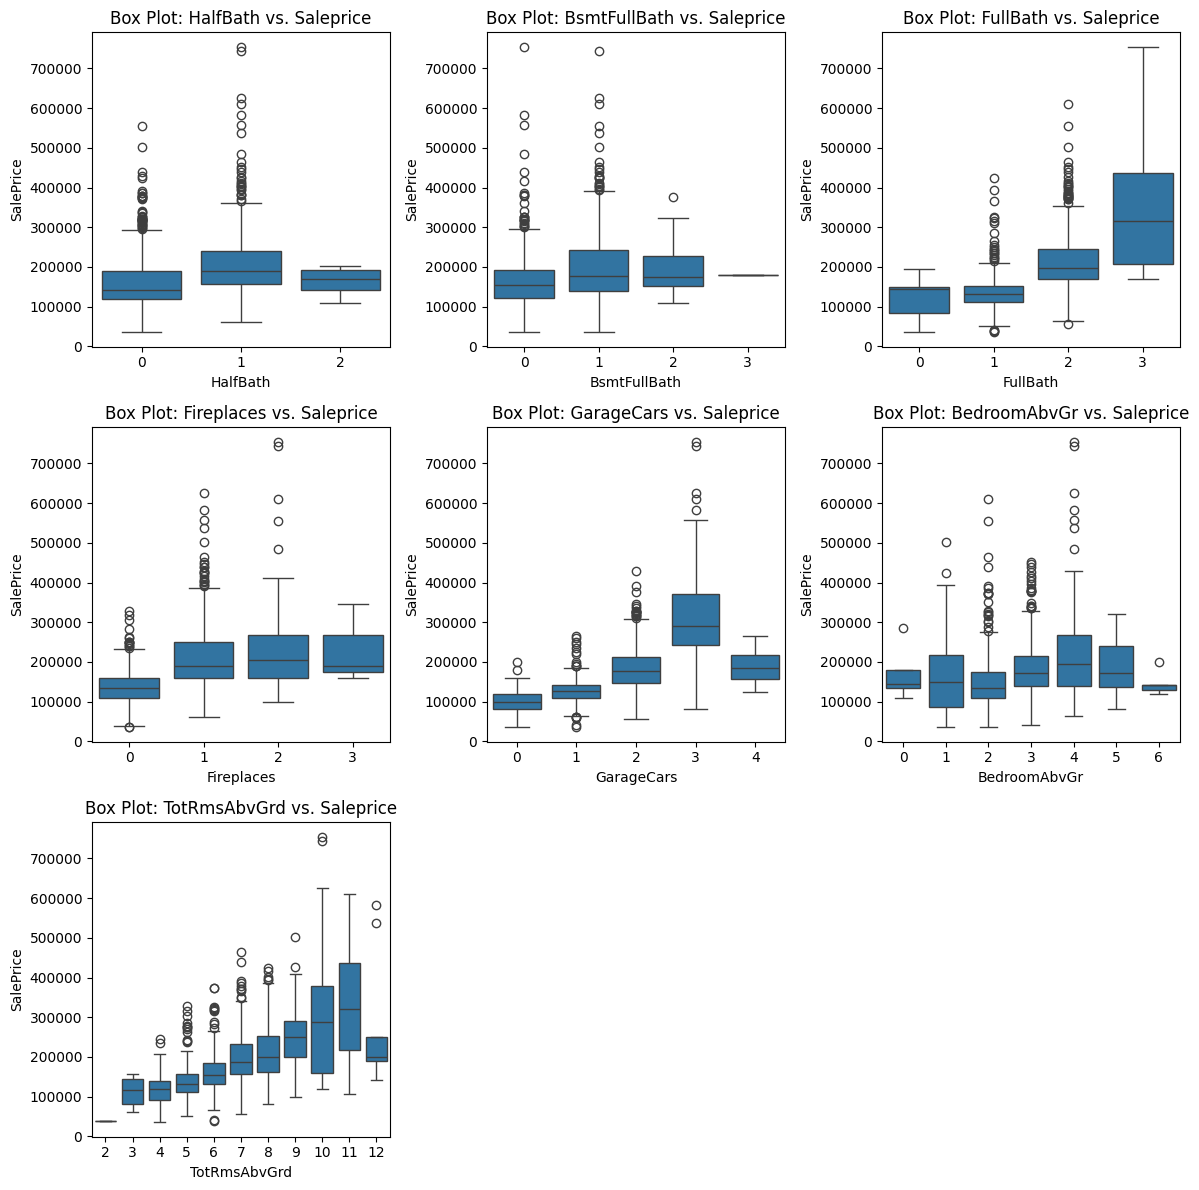

In [52]:
# Plot side-by-side box plots with 3 plots per row
num_plots = len(box_cols)
num_rows = (num_plots + 2) // 3  # Calculate number of rows for subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, 4*num_rows))

# Flatten the axs array to iterate over subplots
axs_flat = axs.flatten()

for i, col in enumerate(box_cols):
    ax = axs_flat[i]
    sns.boxplot(x=col, y='SalePrice', data=counts, ax=ax)
    ax.set_title(f'Box Plot: {col} vs. Saleprice')
    ax.set_xlabel(col)
    ax.set_ylabel('SalePrice')

# Hide empty subplots if num_plots is not a multiple of 3
for j in range(num_plots, num_rows*3):
    axs_flat[j].axis('off')

plt.tight_layout()
plt.show()

There seem to be an increase in price range for houses with TotalRmsAbvGrd and FullBath
There seem to be an increase in price range for houses with GarageCars up to 3 cars
The rest have no obvious correlations

#### Explore Discrete numeric variables

In [53]:
# unique_values(num_df)

Get the names of disceret features. Features that have less than 25 unique values. 
Make sure you've not explored them before

In [54]:
# num_cols, year_features, count_features

In [55]:
# Get the names of discrete features
discrete = [feat for feat in num_df.columns 
            if len(num_df[feat].unique()) < 25 and 
            feat not in year_features and
            feat not in count_features
           ]
discrete

[]

There are no more discrete features

#### The rest of the numeric columns

In [56]:
# num_cols, year_features, count_features, discrete

In [57]:
# Get the names of some the remaining features
continuous = [feat for feat in num_df.columns
              if len(num_df[feat].unique()) > 25 and
              feat not in year_features and
              feat not in count_features and
              feat not in discrete]
continuous

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [58]:
num_continuous = num_df.loc[:, continuous]
num_continuous.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
Id,,,,,,,,,,,,,,,,
977,51.0,5900,0.0,0,0,440,440,869,0,869,0,0,0,0,0,85500
131,88.0,14200,309.0,445,0,479,924,1216,941,2157,487,105,66,0,0,226000
342,60.0,8400,0.0,0,0,721,721,841,0,841,294,250,0,24,0,82000
1107,114.0,10357,0.0,738,0,172,910,1442,0,1442,719,0,244,0,0,179900
1325,75.0,9986,428.0,0,0,1795,1795,1795,0,1795,895,0,49,0,0,147000


In [59]:
num_continuous.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,957.000000,1168.000000,1160.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,70.134796,10577.892123,102.987931,440.101027,48.105308,569.645548,1057.851884,1162.654966,346.427226,1514.470034,475.00000,95.614726,46.720890,22.422089,14.708904,181100.552226
std,25.260476,10715.520454,184.228227,461.747914,163.787938,441.781491,449.097632,392.210063,435.617148,525.411357,214.79892,125.943904,66.575553,62.022779,55.536867,80998.216728
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.00000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,58.000000,7590.000000,0.000000,0.000000,0.000000,225.000000,793.000000,884.000000,0.000000,1123.750000,336.00000,0.000000,0.000000,0.000000,0.000000,129500.000000
50%,70.000000,9458.500000,0.000000,376.000000,0.000000,484.000000,990.000000,1077.000000,0.000000,1456.000000,480.00000,0.000000,25.000000,0.000000,0.000000,163000.000000
75%,80.000000,11515.500000,160.000000,714.500000,0.000000,806.500000,1293.750000,1383.000000,728.000000,1788.000000,576.00000,168.000000,69.000000,0.000000,0.000000,214600.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.00000,736.000000,547.000000,552.000000,480.000000,755000.000000


In [60]:
# continuous

Split them into two.

In [61]:
area = ['LotFrontage', 'LotArea', 'MasVnrArea', 
        'GrLivArea', 'GarageArea']

sf = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
      '1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF',
      'EnclosedPorch', 'ScreenPorch']

#### Area

In [62]:
area_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 
        'GrLivArea', 'GarageArea']

In [63]:
num_area = num_df.loc[:, area_features]
num_area["SalePrice"] = num_df.loc[:, "SalePrice"]
num_area.head()

,LotFrontage,LotArea,MasVnrArea,GrLivArea,GarageArea,SalePrice
Id,,,,,,
977,51.0,5900,0.0,869,0,85500
131,88.0,14200,309.0,2157,487,226000
342,60.0,8400,0.0,841,294,82000
1107,114.0,10357,0.0,1442,719,179900
1325,75.0,9986,428.0,1795,895,147000


In [64]:
num_area.isnull().sum()

LotFrontage    211
LotArea          0
MasVnrArea       8
GrLivArea        0
GarageArea       0
SalePrice        0
dtype: int64

In [65]:
num_area.describe()

,LotFrontage,LotArea,MasVnrArea,GrLivArea,GarageArea,SalePrice
count,957.000000,1168.000000,1160.000000,1168.000000,1168.00000,1168.000000
mean,70.134796,10577.892123,102.987931,1514.470034,475.00000,181100.552226
std,25.260476,10715.520454,184.228227,525.411357,214.79892,80998.216728
min,21.000000,1300.000000,0.000000,334.000000,0.00000,34900.000000
25%,58.000000,7590.000000,0.000000,1123.750000,336.00000,129500.000000
50%,70.000000,9458.500000,0.000000,1456.000000,480.00000,163000.000000
75%,80.000000,11515.500000,160.000000,1788.000000,576.00000,214600.000000
max,313.000000,215245.000000,1600.000000,5642.000000,1418.00000,755000.000000


<Axes: xlabel='LotFrontage', ylabel='Count'>

Text(0.5, 1.0, 'LotFrontage')

<Axes: xlabel='LotArea', ylabel='Count'>

Text(0.5, 1.0, 'LotArea')

<Axes: xlabel='MasVnrArea', ylabel='Count'>

Text(0.5, 1.0, 'MasVnrArea')

<Axes: xlabel='GrLivArea', ylabel='Count'>

Text(0.5, 1.0, 'GrLivArea')

<Axes: xlabel='GarageArea', ylabel='Count'>

Text(0.5, 1.0, 'GarageArea')

<Axes: xlabel='SalePrice', ylabel='Count'>

Text(0.5, 1.0, 'SalePrice')

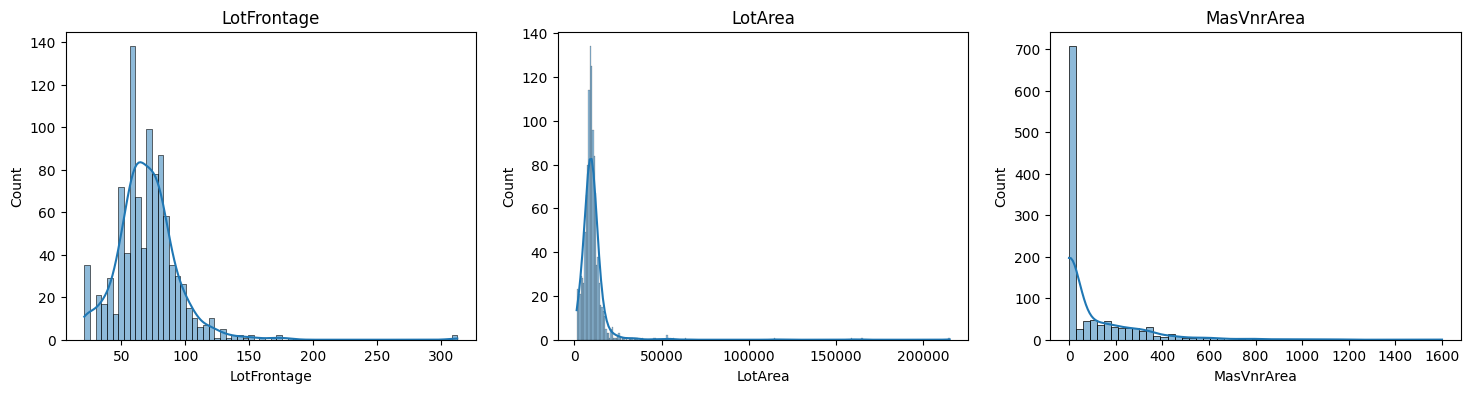

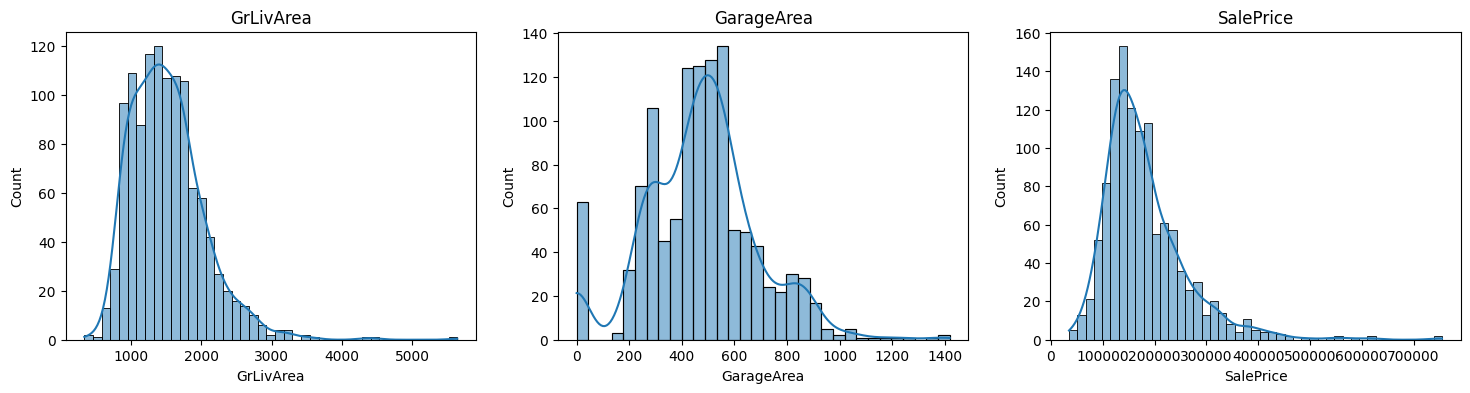

<Figure size 1800x400 with 0 Axes>

In [66]:
# Histogram of all features
ix = 1
fig = plt.figure(figsize = (18, 4));
for col in num_area.columns:
    if ix <= 3:
        ax1 = fig.add_subplot(1,3,ix);
        sns.histplot(data=num_area, x=col, kde=True)
        plt.title(col)
        # plt.show();
        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (18, 4));
        ix =1    

LotArea, MasVnrArea are extremely negatively skewed
The rest are negatively skewed

Nothing that log transformation cannot solve

<Axes: xlabel='LotFrontage', ylabel='Count'>

Text(0.5, 1.0, 'LotFrontage')

<Axes: xlabel='LotArea', ylabel='Count'>

Text(0.5, 1.0, 'LotArea')

<Axes: xlabel='MasVnrArea', ylabel='Count'>

Text(0.5, 1.0, 'MasVnrArea')

<Axes: xlabel='GrLivArea', ylabel='Count'>

Text(0.5, 1.0, 'GrLivArea')

<Axes: xlabel='GarageArea', ylabel='Count'>

Text(0.5, 1.0, 'GarageArea')

<Axes: xlabel='SalePrice', ylabel='Count'>

Text(0.5, 1.0, 'SalePrice')

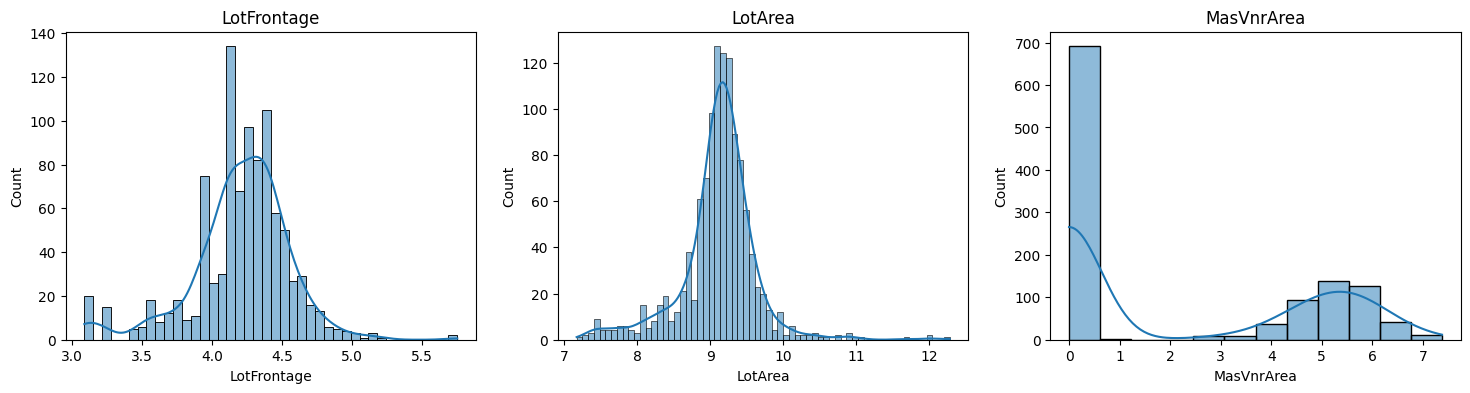

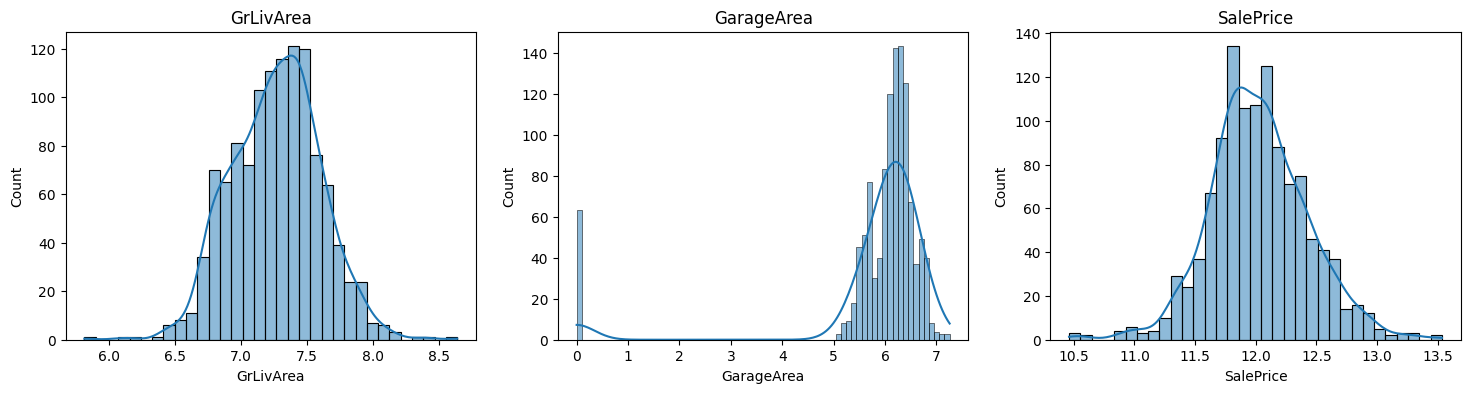

<Figure size 1800x400 with 0 Axes>

In [67]:
# Histogram of all features
ix = 1
fig = plt.figure(figsize = (18, 4));
for col in np.log1p(num_area).columns:
    if ix <= 3:
        ax1 = fig.add_subplot(1,3,ix);
        sns.histplot(data=np.log1p(num_area), x=col, kde=True)
        plt.title(col)
        # plt.show();
        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (18, 4));
        ix =1    

Log transformation did not work on MasVnrArea and GarageArea

#### Squarefeet features

In [68]:
sf_features = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
      '1stFlrSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF',
      'EnclosedPorch', 'ScreenPorch']

In [69]:
num_sf = num_df.loc[:, sf_features]
num_sf["SalePrice"] = num_df.loc[:, "SalePrice"]
num_sf.head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
Id,,,,,,,,,,,
977,0,0,440,440,869,0,0,0,0,0,85500
131,445,0,479,924,1216,941,105,66,0,0,226000
342,0,0,721,721,841,0,250,0,24,0,82000
1107,738,0,172,910,1442,0,0,244,0,0,179900
1325,0,0,1795,1795,1795,0,0,49,0,0,147000


In [70]:
num_sf.isnull().sum()

BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
SalePrice        0
dtype: int64

In [71]:
num_sf.describe()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,440.101027,48.105308,569.645548,1057.851884,1162.654966,346.427226,95.614726,46.720890,22.422089,14.708904,181100.552226
std,461.747914,163.787938,441.781491,449.097632,392.210063,435.617148,125.943904,66.575553,62.022779,55.536867,80998.216728
min,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,0.000000,0.000000,225.000000,793.000000,884.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129500.000000
50%,376.000000,0.000000,484.000000,990.000000,1077.000000,0.000000,0.000000,25.000000,0.000000,0.000000,163000.000000
75%,714.500000,0.000000,806.500000,1293.750000,1383.000000,728.000000,168.000000,69.000000,0.000000,0.000000,214600.000000
max,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,736.000000,547.000000,552.000000,480.000000,755000.000000


<Axes: xlabel='BsmtFinSF1', ylabel='Count'>

Text(0.5, 1.0, 'BsmtFinSF1')

<Axes: xlabel='BsmtFinSF2', ylabel='Count'>

Text(0.5, 1.0, 'BsmtFinSF2')

<Axes: xlabel='BsmtUnfSF', ylabel='Count'>

Text(0.5, 1.0, 'BsmtUnfSF')

<Axes: xlabel='TotalBsmtSF', ylabel='Count'>

Text(0.5, 1.0, 'TotalBsmtSF')

<Axes: xlabel='1stFlrSF', ylabel='Count'>

Text(0.5, 1.0, '1stFlrSF')

<Axes: xlabel='2ndFlrSF', ylabel='Count'>

Text(0.5, 1.0, '2ndFlrSF')

<Axes: xlabel='WoodDeckSF', ylabel='Count'>

Text(0.5, 1.0, 'WoodDeckSF')

<Axes: xlabel='OpenPorchSF', ylabel='Count'>

Text(0.5, 1.0, 'OpenPorchSF')

<Axes: xlabel='EnclosedPorch', ylabel='Count'>

Text(0.5, 1.0, 'EnclosedPorch')

<Axes: xlabel='ScreenPorch', ylabel='Count'>

Text(0.5, 1.0, 'ScreenPorch')

<Axes: xlabel='SalePrice', ylabel='Count'>

Text(0.5, 1.0, 'SalePrice')

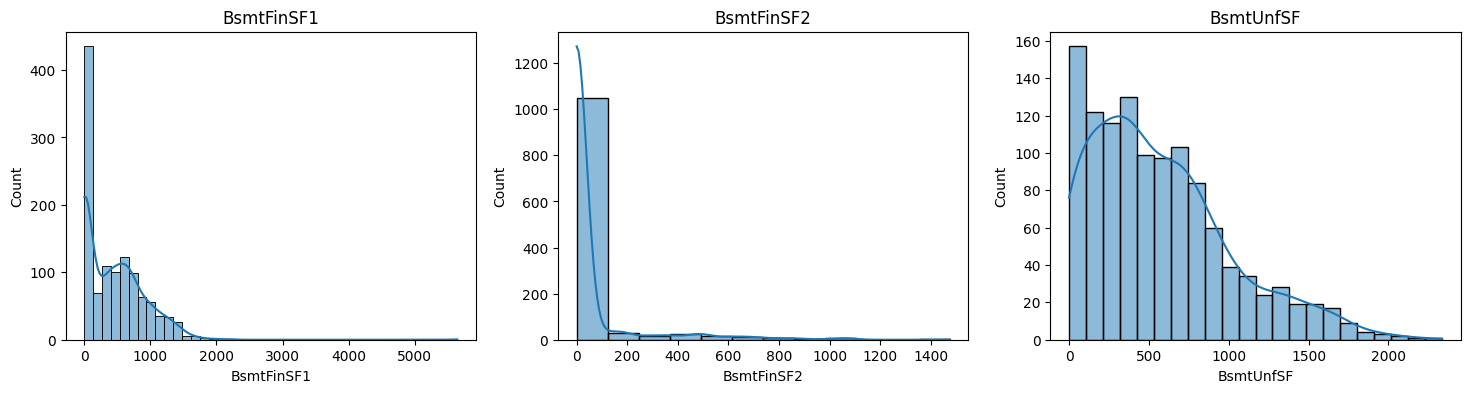

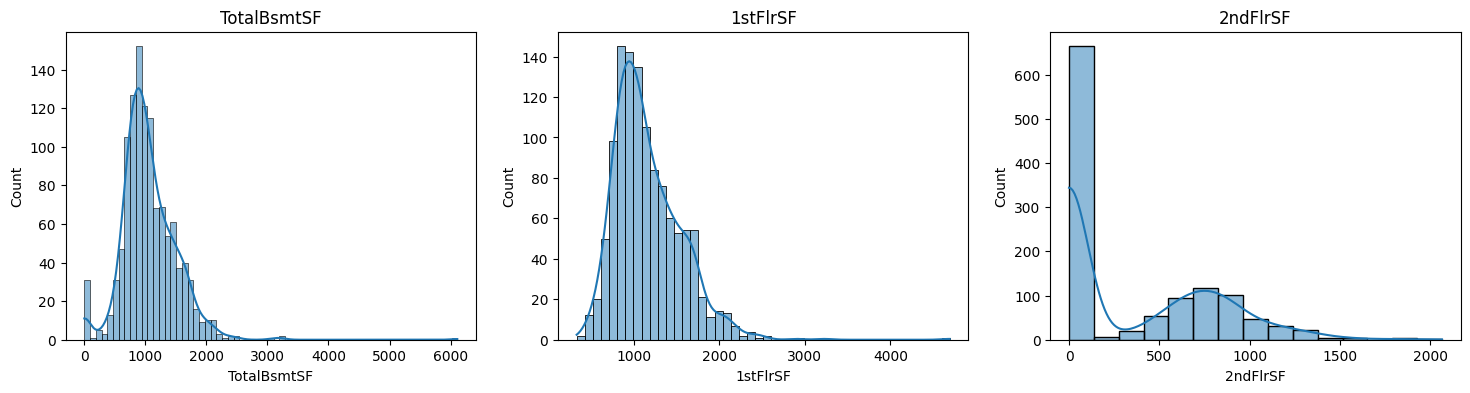

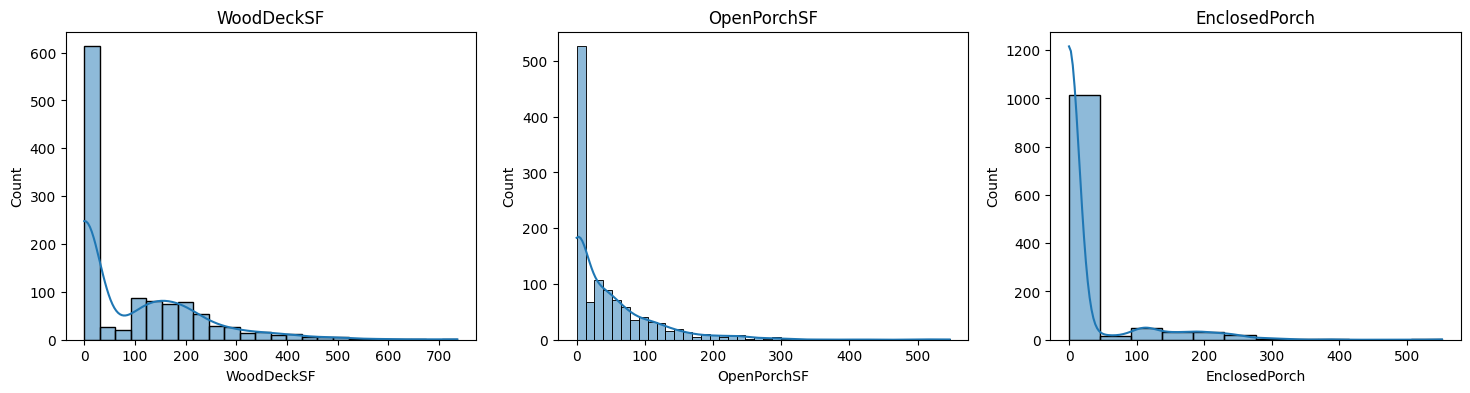

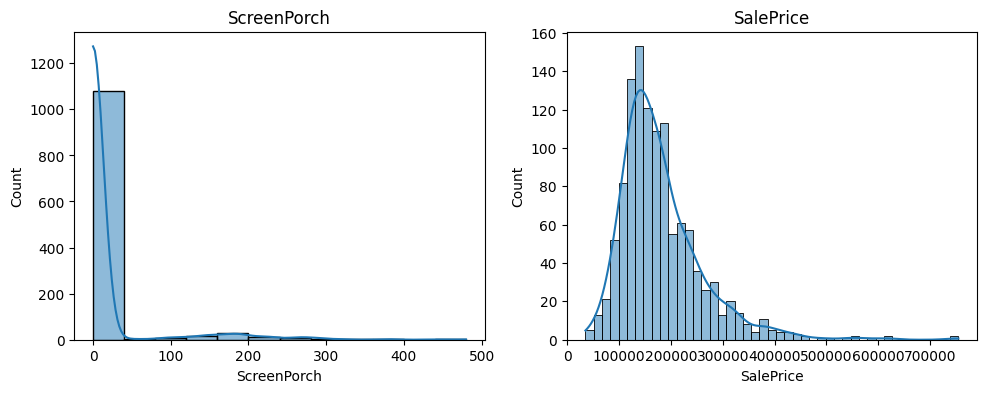

In [72]:
# Histogram of all features
ix = 1
fig = plt.figure(figsize = (18, 4));
for col in num_sf.columns:
    if ix <= 3:
        ax1 = fig.add_subplot(1,3,ix);
        sns.histplot(data=num_sf, x=col, kde=True)
        plt.title(col)
        # plt.show();
        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (18, 4));
        ix =1    

In [73]:
# num_sf.EnclosedPorch.value_counts() / len(num_sf)
# num_sf.EnclosedPorch.value_counts()

Dont drop them. Let the model determine whether to use them or not

# Categorical columns

In [74]:
cat_df["SalePrice"] = num_df.loc[:, "SalePrice"]
cat_df = cat_df.fillna('missing')
cat_df.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
977,30,RL,missing,IR1,Bnk,Inside,BrkSide,Norm,1Fam,1Story,4,7,Gable,Wd Sdng,Wd Sdng,missing,TA,TA,PConc,Gd,TA,No,Unf,Unf,TA,Y,FuseA,Fa,Typ,missing,missing,missing,Y,missing,missing,missing,8,WD,Normal,85500
131,60,RL,missing,Reg,Lvl,Corner,NAmes,Norm,1Fam,2Story,7,6,Gable,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,No,Rec,Unf,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,Y,missing,GdPrv,missing,5,WD,Normal,226000
342,20,RH,missing,Reg,Lvl,Inside,SawyerW,Feedr,1Fam,1Story,4,4,Gable,Wd Sdng,AsbShng,missing,Fa,Fa,CBlock,TA,Fa,No,Unf,Unf,Gd,Y,SBrkr,TA,Typ,missing,CarPort,Unf,N,missing,missing,missing,9,WD,Normal,82000
1107,20,RL,missing,IR1,Lvl,Corner,SawyerW,Feedr,1Fam,1Story,7,5,Hip,HdBoard,HdBoard,missing,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,Y,missing,missing,missing,5,WD,Normal,179900
1325,20,RL,missing,Reg,Lvl,Inside,Somerst,Norm,1Fam,1Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,TA,Av,Unf,Unf,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,Y,missing,missing,missing,2,New,Partial,147000


In [75]:
# These are the columns with missing values
get_highly_imbalanced_columns(cat_df, 0.9)

['Alley',
 'LandContour',
 'CentralAir',
 'Electrical',
 'Functional',
 'PavedDrive',
 'PoolQC',
 'MiscFeature']

In [76]:
def drop_imbalanced(df):
    df = df.drop(columns=[
        'Alley', 'LandContour',
        'CentralAir', 'Electrical',
        'Functional', 'PavedDrive',
        'PoolQC', 'MiscFeature'])
    return df

In [77]:
cat_df = drop_imbalanced(cat_df)
cat_df.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,MoSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
977,30,RL,IR1,Inside,BrkSide,Norm,1Fam,1Story,4,7,Gable,Wd Sdng,Wd Sdng,missing,TA,TA,PConc,Gd,TA,No,Unf,Unf,TA,Fa,missing,missing,missing,missing,8,WD,Normal,85500
131,60,RL,Reg,Corner,NAmes,Norm,1Fam,2Story,7,6,Gable,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,No,Rec,Unf,Ex,Gd,Gd,Attchd,Fin,GdPrv,5,WD,Normal,226000
342,20,RH,Reg,Inside,SawyerW,Feedr,1Fam,1Story,4,4,Gable,Wd Sdng,AsbShng,missing,Fa,Fa,CBlock,TA,Fa,No,Unf,Unf,Gd,TA,missing,CarPort,Unf,missing,9,WD,Normal,82000
1107,20,RL,IR1,Corner,SawyerW,Feedr,1Fam,1Story,7,5,Hip,HdBoard,HdBoard,missing,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Gd,Gd,TA,Attchd,Fin,missing,5,WD,Normal,179900
1325,20,RL,Reg,Inside,Somerst,Norm,1Fam,1Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,TA,Av,Unf,Unf,Ex,Gd,Gd,Attchd,RFn,missing,2,New,Partial,147000


In [78]:
cat_feats = cat_df.columns
cat_feats

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'MoSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [79]:
unique_values(cat_df)

,Total,Uniques,Values
ExterCond,1168,4,"[[TA, Fa, Gd, Ex]]"
KitchenQual,1168,4,"[[Fa, Gd, TA, Ex]]"
HeatingQC,1168,4,"[[TA, Ex, Gd, Fa]]"
ExterQual,1168,4,"[[TA, Fa, Gd, Ex]]"
MasVnrType,1168,4,"[[missing, BrkFace, BrkCmn, Stone]]"
GarageFinish,1168,4,"[[missing, Fin, Unf, RFn]]"
LotShape,1168,4,"[[IR1, Reg, IR2, IR3]]"
BldgType,1168,5,"[[1Fam, TwnhsE, Duplex, Twnhs, 2fmCon]]"
MSZoning,1168,5,"[[RL, RH, RM, C (all), FV]]"
BsmtExposure,1168,5,"[[No, Mn, Av, Gd, missing]]"


In [80]:
cat_cols = cat_df.columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'MoSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

#### Less than 5 featires

In [81]:
# Get the names of some discrete features
less5_feats = [feat for feat in cat_cols 
            if len(cat_df[feat].unique()) < 5]
less5_feats

['LotShape',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'HeatingQC',
 'KitchenQual',
 'GarageFinish']

In [82]:
less5_df = cat_df.loc[:, less5_feats]
# less5_df["SalePrice"] = num_df.loc[:, "SalePrice"]
less5_df.head()

,LotShape,MasVnrType,ExterQual,ExterCond,HeatingQC,KitchenQual,GarageFinish
Id,,,,,,,
977,IR1,missing,TA,TA,TA,Fa,missing
131,Reg,BrkFace,TA,TA,Ex,Gd,Fin
342,Reg,missing,Fa,Fa,Gd,TA,Unf
1107,IR1,missing,Gd,TA,Gd,Gd,Fin
1325,Reg,BrkFace,Gd,TA,Ex,Gd,RFn


<Axes: xlabel='LotShape', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for LotShape')

Text(0.0, 393.1, '33.65%')

Text(1.0, 736.1, '63.01%')

Text(2.0, 30.1, '2.57%')

Text(3.0, 9.1, '0.77%')

<Axes: xlabel='MasVnrType', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for MasVnrType')

Text(0.0, 702.1, '60.10%')

Text(1.0, 354.1, '30.31%')

Text(2.0, 11.1, '0.94%')

Text(3.0, 101.1, '8.65%')

<Axes: xlabel='ExterQual', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for ExterQual')

Text(0.0, 725.1, '62.07%')

Text(1.0, 11.1, '0.94%')

Text(2.0, 391.1, '33.48%')

Text(3.0, 41.1, '3.51%')

<Axes: xlabel='ExterCond', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for ExterCond')

Text(0.0, 1036.1, '88.70%')

Text(1.0, 21.1, '1.80%')

Text(2.0, 108.1, '9.25%')

Text(3.0, 3.1, '0.26%')

<Axes: xlabel='HeatingQC', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for HeatingQC')

Text(0.0, 346.1, '29.62%')

Text(1.0, 590.1, '50.51%')

Text(2.0, 192.1, '16.44%')

Text(3.0, 40.1, '3.42%')

<Axes: xlabel='KitchenQual', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for KitchenQual')

Text(0.0, 31.1, '2.65%')

Text(1.0, 473.1, '40.50%')

Text(2.0, 587.1, '50.26%')

Text(3.0, 77.1, '6.59%')

<Axes: xlabel='GarageFinish', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for GarageFinish')

Text(0.0, 63.1, '5.39%')

Text(1.0, 276.1, '23.63%')

Text(2.0, 488.1, '41.78%')

Text(3.0, 341.1, '29.20%')

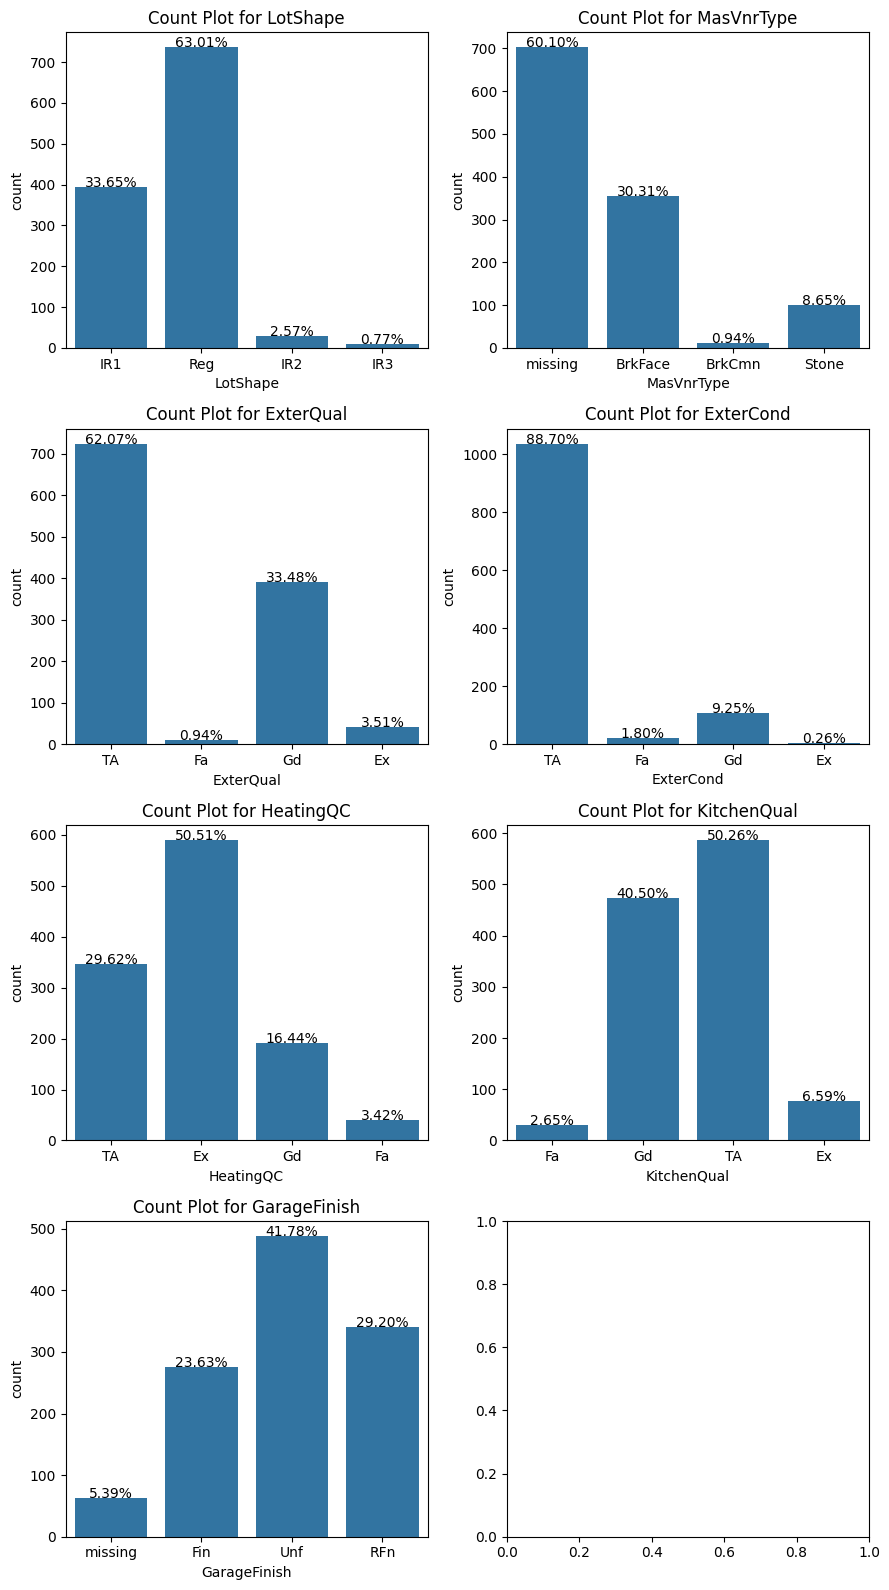

In [83]:
# Calculate percentage for each count
total_rows = len(less5_df)
percentages = (less5_df.value_counts() / total_rows) * 100

# Plot count plots with percentages
num_count_cols = len(less5_df.columns)
fig, axs = plt.subplots(nrows=(num_count_cols + 1) // 2, ncols=2, figsize=(9, 4 * ((num_count_cols + 1) // 2)))

for i, col in enumerate(less5_df.columns):
    ax = axs[i // 2, i % 2]
    sns.countplot(x=col, data=less5_df, ax=ax)
    ax.set_title(f'Count Plot for {col}')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height / total_rows * 100:.2f}%', ha='center')

plt.tight_layout()
plt.show()

#### 5 to 10 features

In [84]:
# Get the names of some discrete features
fiveten_feats = [feat for feat in cat_cols 
            if (cat_df[feat].nunique()) >= 5 and
                 (cat_df[feat].nunique()) <= 10
                ]
fiveten_feats

['MSZoning',
 'LotConfig',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'Fence',
 'SaleType',
 'SaleCondition']

In [85]:
fiveten_df = cat_df.loc[:, fiveten_feats]
fiveten_df = fiveten_df.fillna('missing')
# fiveten_df["SalePrice"] = num_df.loc[:, "SalePrice"]
fiveten_df.head()

,MSZoning,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,Fence,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,
977,RL,Inside,Norm,1Fam,1Story,4,7,Gable,PConc,Gd,TA,No,Unf,Unf,missing,missing,missing,WD,Normal
131,RL,Corner,Norm,1Fam,2Story,7,6,Gable,CBlock,TA,TA,No,Rec,Unf,Gd,Attchd,GdPrv,WD,Normal
342,RH,Inside,Feedr,1Fam,1Story,4,4,Gable,CBlock,TA,Fa,No,Unf,Unf,missing,CarPort,missing,WD,Normal
1107,RL,Corner,Feedr,1Fam,1Story,7,5,Hip,PConc,Gd,TA,Mn,GLQ,Unf,TA,Attchd,missing,WD,Normal
1325,RL,Inside,Norm,1Fam,1Story,8,5,Gable,PConc,Ex,TA,Av,Unf,Unf,Gd,Attchd,missing,New,Partial


<Axes: xlabel='MSZoning', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for MSZoning')

Text(0.0, 922.1, '78.94%')

Text(1.0, 14.1, '1.20%')

Text(2.0, 170.1, '14.55%')

Text(3.0, 10.1, '0.86%')

Text(4.0, 52.1, '4.45%')

<Axes: xlabel='LotConfig', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for LotConfig')

Text(0.0, 832.1, '71.23%')

Text(1.0, 210.1, '17.98%')

Text(2.0, 86.1, '7.36%')

Text(3.0, 38.1, '3.25%')

Text(4.0, 2.1, '0.17%')

<Axes: xlabel='Condition1', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for Condition1')

Text(0.0, 1013.1, '86.73%')

Text(1.0, 60.1, '5.14%')

Text(2.0, 21.1, '1.80%')

Text(3.0, 2.1, '0.17%')

Text(4.0, 39.1, '3.34%')

Text(5.0, 6.1, '0.51%')

Text(6.0, 8.1, '0.68%')

Text(7.0, 15.1, '1.28%')

Text(8.0, 4.1, '0.34%')

<Axes: xlabel='BldgType', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for BldgType')

Text(0.0, 975.1, '83.48%')

Text(1.0, 92.1, '7.88%')

Text(2.0, 43.1, '3.68%')

Text(3.0, 34.1, '2.91%')

Text(4.0, 24.1, '2.05%')

<Axes: xlabel='HouseStyle', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for HouseStyle')

Text(0.0, 582.1, '49.83%')

Text(1.0, 359.1, '30.74%')

Text(2.0, 120.1, '10.27%')

Text(3.0, 52.1, '4.45%')

Text(4.0, 13.1, '1.11%')

Text(5.0, 29.1, '2.48%')

Text(6.0, 8.1, '0.68%')

Text(7.0, 5.1, '0.43%')

<Axes: xlabel='OverallQual', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for OverallQual')

Text(0.0, 2.1, '0.17%')

Text(1.0, 3.1, '0.26%')

Text(2.0, 13.1, '1.11%')

Text(3.0, 94.1, '8.05%')

Text(4.0, 322.1, '27.57%')

Text(5.0, 298.1, '25.51%')

Text(6.0, 260.1, '22.26%')

Text(7.0, 129.1, '11.04%')

Text(8.0, 32.1, '2.74%')

Text(9.0, 15.1, '1.28%')

<Axes: xlabel='OverallCond', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for OverallCond')

Text(0.0, 1.1, '0.09%')

Text(1.0, 4.1, '0.34%')

Text(2.0, 24.1, '2.05%')

Text(3.0, 46.1, '3.94%')

Text(4.0, 652.1, '55.82%')

Text(5.0, 208.1, '17.81%')

Text(6.0, 163.1, '13.96%')

Text(7.0, 51.1, '4.37%')

Text(8.0, 19.1, '1.63%')

<Axes: xlabel='RoofStyle', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for RoofStyle')

Text(0.0, 915.1, '78.34%')

Text(1.0, 224.1, '19.18%')

Text(2.0, 12.1, '1.03%')

Text(3.0, 6.1, '0.51%')

Text(4.0, 10.1, '0.86%')

Text(5.0, 1.1, '0.09%')

<Axes: xlabel='Foundation', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for Foundation')

Text(0.0, 508.1, '43.49%')

Text(1.0, 510.1, '43.66%')

Text(2.0, 123.1, '10.53%')

Text(3.0, 20.1, '1.71%')

Text(4.0, 5.1, '0.43%')

Text(5.0, 2.1, '0.17%')

<Axes: xlabel='BsmtQual', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for BsmtQual')

Text(0.0, 486.1, '41.61%')

Text(1.0, 524.1, '44.86%')

Text(2.0, 98.1, '8.39%')

Text(3.0, 29.1, '2.48%')

Text(4.0, 31.1, '2.65%')

<Axes: xlabel='BsmtCond', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for BsmtCond')

Text(0.0, 1047.1, '89.64%')

Text(1.0, 35.1, '3.00%')

Text(2.0, 2.1, '0.17%')

Text(3.0, 53.1, '4.54%')

Text(4.0, 31.1, '2.65%')

<Axes: xlabel='BsmtExposure', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for BsmtExposure')

Text(0.0, 770.1, '65.92%')

Text(1.0, 85.1, '7.28%')

Text(2.0, 179.1, '15.33%')

Text(3.0, 102.1, '8.73%')

Text(4.0, 32.1, '2.74%')

<Axes: xlabel='BsmtFinType1', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for BsmtFinType1')

Text(0.0, 350.1, '29.97%')

Text(1.0, 104.1, '8.90%')

Text(2.0, 325.1, '27.83%')

Text(3.0, 176.1, '15.07%')

Text(4.0, 120.1, '10.27%')

Text(5.0, 62.1, '5.31%')

Text(6.0, 31.1, '2.65%')

<Axes: xlabel='BsmtFinType2', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for BsmtFinType2')

Text(0.0, 1001.1, '85.70%')

Text(1.0, 50.1, '4.28%')

Text(2.0, 35.1, '3.00%')

Text(3.0, 18.1, '1.54%')

Text(4.0, 32.1, '2.74%')

Text(5.0, 10.1, '0.86%')

Text(6.0, 22.1, '1.88%')

<Axes: xlabel='FireplaceQu', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for FireplaceQu')

Text(0.0, 542.1, '46.40%')

Text(1.0, 308.1, '26.37%')

Text(2.0, 252.1, '21.58%')

Text(3.0, 21.1, '1.80%')

Text(4.0, 18.1, '1.54%')

Text(5.0, 27.1, '2.31%')

<Axes: xlabel='GarageType', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for GarageType')

Text(0.0, 63.1, '5.39%')

Text(1.0, 689.1, '58.99%')

Text(2.0, 9.1, '0.77%')

Text(3.0, 313.1, '26.80%')

Text(4.0, 73.1, '6.25%')

Text(5.0, 15.1, '1.28%')

Text(6.0, 6.1, '0.51%')

<Axes: xlabel='Fence', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for Fence')

Text(0.0, 938.1, '80.31%')

Text(1.0, 47.1, '4.02%')

Text(2.0, 133.1, '11.39%')

Text(3.0, 42.1, '3.60%')

Text(4.0, 8.1, '0.68%')

<Axes: xlabel='SaleType', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for SaleType')

Text(0.0, 1012.1, '86.64%')

Text(1.0, 94.1, '8.05%')

Text(2.0, 39.1, '3.34%')

Text(3.0, 3.1, '0.26%')

Text(4.0, 2.1, '0.17%')

Text(5.0, 4.1, '0.34%')

Text(6.0, 4.1, '0.34%')

Text(7.0, 6.1, '0.51%')

Text(8.0, 4.1, '0.34%')

<Axes: xlabel='SaleCondition', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for SaleCondition')

Text(0.0, 958.1, '82.02%')

Text(1.0, 95.1, '8.13%')

Text(2.0, 10.1, '0.86%')

Text(3.0, 86.1, '7.36%')

Text(4.0, 15.1, '1.28%')

Text(5.0, 4.1, '0.34%')

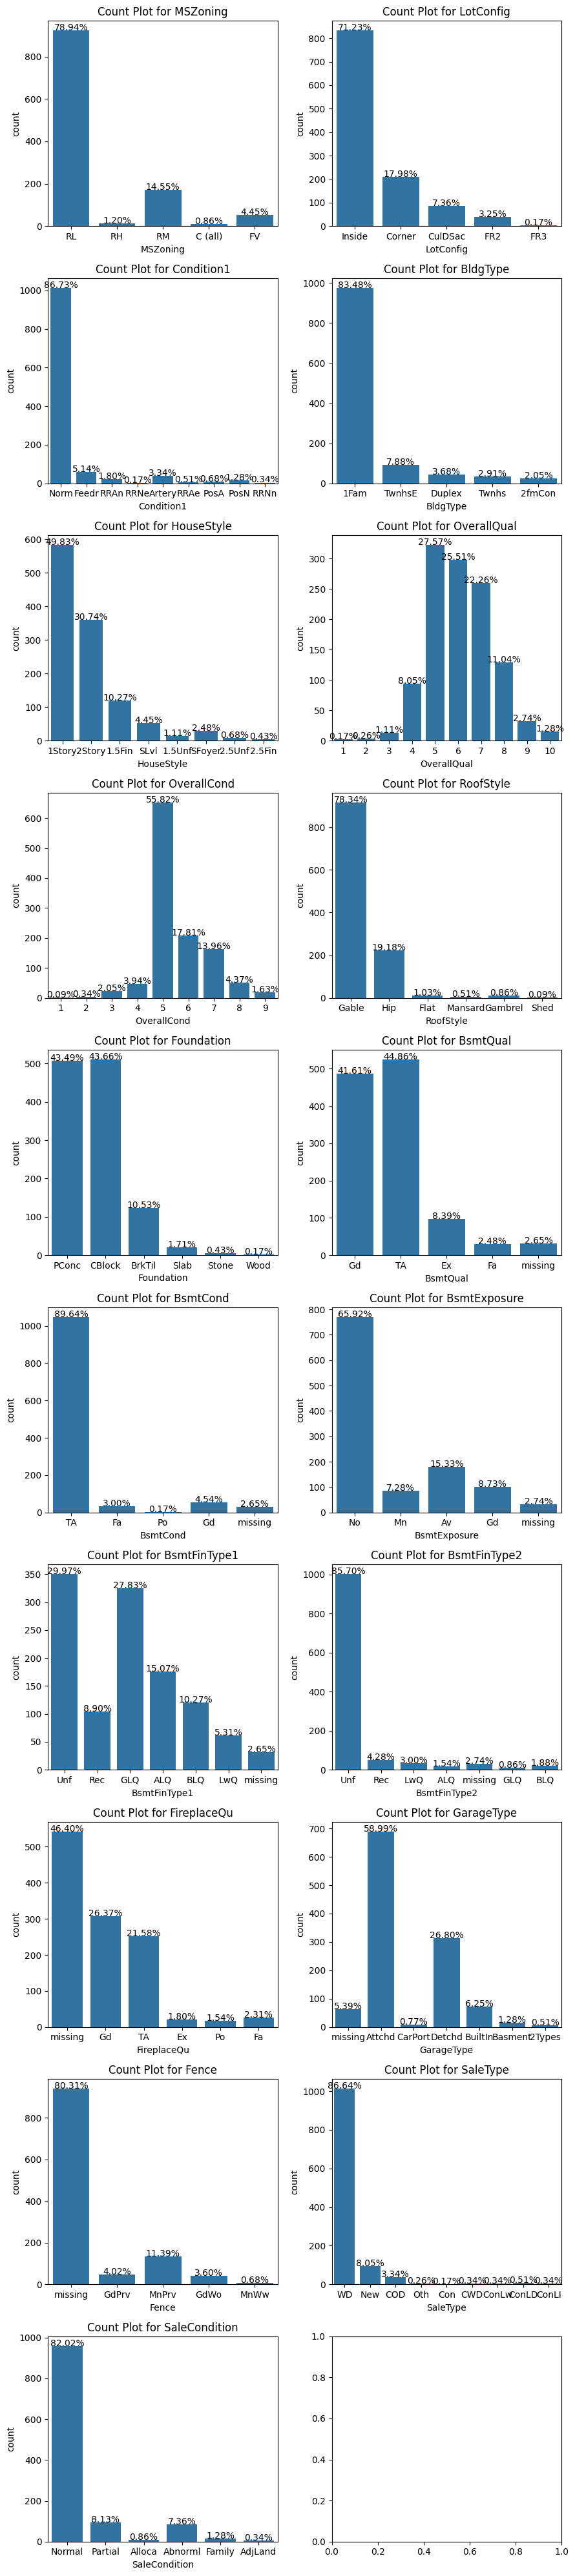

In [86]:
# Calculate percentage for each count
total_rows = len(fiveten_df)
percentages = (fiveten_df.value_counts() / total_rows) * 100

# Plot count plots with percentages
num_count_cols = len(fiveten_df.columns)
fig, axs = plt.subplots(nrows=(num_count_cols + 1) // 2, ncols=2, figsize=(9, 4 * ((num_count_cols + 1) // 2)))

for i, col in enumerate(fiveten_df.columns):
    ax = axs[i // 2, i % 2]
    sns.countplot(x=col, data=fiveten_df, ax=ax)
    ax.set_title(f'Count Plot for {col}')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height / total_rows * 100:.2f}%', ha='center')

plt.tight_layout()
plt.show()

Dont drop any of them. Just make sure that you ate X_training according to feature importance

#### > 10 features

In [87]:
unique_values(cat_df)

,Total,Uniques,Values
ExterCond,1168,4,"[[TA, Fa, Gd, Ex]]"
KitchenQual,1168,4,"[[Fa, Gd, TA, Ex]]"
HeatingQC,1168,4,"[[TA, Ex, Gd, Fa]]"
ExterQual,1168,4,"[[TA, Fa, Gd, Ex]]"
MasVnrType,1168,4,"[[missing, BrkFace, BrkCmn, Stone]]"
GarageFinish,1168,4,"[[missing, Fin, Unf, RFn]]"
LotShape,1168,4,"[[IR1, Reg, IR2, IR3]]"
BldgType,1168,5,"[[1Fam, TwnhsE, Duplex, Twnhs, 2fmCon]]"
MSZoning,1168,5,"[[RL, RH, RM, C (all), FV]]"
BsmtExposure,1168,5,"[[No, Mn, Av, Gd, missing]]"


In [88]:
# Get the names of some discrete features
grtten_feats = [feat for feat in cat_cols 
            if (cat_df[feat].nunique()) >= 10 and
                 (cat_df[feat].nunique()) < 24
                ]
grtten_feats

['MSSubClass', 'OverallQual', 'Exterior1st', 'Exterior2nd', 'MoSold']

In [89]:
grtten_df = cat_df.loc[:, grtten_feats]
# grtten_df["SalePrice"] = num_df.loc[:, "SalePrice"]
grtten_df.head()

,MSSubClass,OverallQual,Exterior1st,Exterior2nd,MoSold
Id,,,,,
977,30,4,Wd Sdng,Wd Sdng,8
131,60,7,MetalSd,MetalSd,5
342,20,4,Wd Sdng,AsbShng,9
1107,20,7,HdBoard,HdBoard,5
1325,20,8,VinylSd,VinylSd,2


<Axes: xlabel='MSSubClass', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for MSSubClass')

[Text(0, 0, '30'),
 Text(1, 0, '60'),
 Text(2, 0, '20'),
 Text(3, 0, '50'),
 Text(4, 0, '80'),
 Text(5, 0, '120'),
 Text(6, 0, '45'),
 Text(7, 0, '70'),
 Text(8, 0, '90'),
 Text(9, 0, '180'),
 Text(10, 0, '85'),
 Text(11, 0, '160'),
 Text(12, 0, '40'),
 Text(13, 0, '190'),
 Text(14, 0, '75')]

Text(0.0, 432.1, '36.99%')

Text(1.0, 54.1, '4.62%')

Text(2.0, 3.1, '0.26%')

Text(3.0, 11.1, '0.94%')

Text(4.0, 112.1, '9.59%')

Text(5.0, 241.1, '20.63%')

Text(6.0, 48.1, '4.11%')

Text(7.0, 12.1, '1.03%')

Text(8.0, 47.1, '4.02%')

Text(9.0, 14.1, '1.20%')

Text(10.0, 43.1, '3.68%')

Text(11.0, 67.1, '5.74%')

Text(12.0, 52.1, '4.45%')

Text(13.0, 9.1, '0.77%')

Text(14.0, 23.1, '1.97%')

<Axes: xlabel='OverallQual', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for OverallQual')

[Text(0, 0, '4'),
 Text(1, 0, '7'),
 Text(2, 0, '8'),
 Text(3, 0, '6'),
 Text(4, 0, '5'),
 Text(5, 0, '1'),
 Text(6, 0, '10'),
 Text(7, 0, '9'),
 Text(8, 0, '3'),
 Text(9, 0, '2')]

Text(0.0, 2.1, '0.17%')

Text(1.0, 3.1, '0.26%')

Text(2.0, 13.1, '1.11%')

Text(3.0, 94.1, '8.05%')

Text(4.0, 322.1, '27.57%')

Text(5.0, 298.1, '25.51%')

Text(6.0, 260.1, '22.26%')

Text(7.0, 129.1, '11.04%')

Text(8.0, 32.1, '2.74%')

Text(9.0, 15.1, '1.28%')

<Axes: xlabel='Exterior1st', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for Exterior1st')

[Text(0, 0, 'Wd Sdng'),
 Text(1, 0, 'MetalSd'),
 Text(2, 0, 'HdBoard'),
 Text(3, 0, 'VinylSd'),
 Text(4, 0, 'Stucco'),
 Text(5, 0, 'Plywood'),
 Text(6, 0, 'WdShing'),
 Text(7, 0, 'BrkFace'),
 Text(8, 0, 'ImStucc'),
 Text(9, 0, 'CemntBd'),
 Text(10, 0, 'AsbShng'),
 Text(11, 0, 'BrkComm'),
 Text(12, 0, 'CBlock'),
 Text(13, 0, 'Stone'),
 Text(14, 0, 'AsphShn')]

Text(0.0, 163.1, '13.96%')

Text(1.0, 172.1, '14.73%')

Text(2.0, 180.1, '15.41%')

Text(3.0, 409.1, '35.02%')

Text(4.0, 22.1, '1.88%')

Text(5.0, 91.1, '7.79%')

Text(6.0, 19.1, '1.63%')

Text(7.0, 39.1, '3.34%')

Text(8.0, 1.1, '0.09%')

Text(9.0, 49.1, '4.20%')

Text(10.0, 18.1, '1.54%')

Text(11.0, 2.1, '0.17%')

Text(12.0, 1.1, '0.09%')

Text(13.0, 1.1, '0.09%')

Text(14.0, 1.1, '0.09%')

<Axes: xlabel='Exterior2nd', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for Exterior2nd')

[Text(0, 0, 'Wd Sdng'),
 Text(1, 0, 'MetalSd'),
 Text(2, 0, 'AsbShng'),
 Text(3, 0, 'HdBoard'),
 Text(4, 0, 'VinylSd'),
 Text(5, 0, 'Stucco'),
 Text(6, 0, 'Plywood'),
 Text(7, 0, 'Wd Shng'),
 Text(8, 0, 'BrkFace'),
 Text(9, 0, 'ImStucc'),
 Text(10, 0, 'CmentBd'),
 Text(11, 0, 'Brk Cmn'),
 Text(12, 0, 'Stone'),
 Text(13, 0, 'AsphShn'),
 Text(14, 0, 'CBlock')]

Text(0.0, 157.1, '13.44%')

Text(1.0, 166.1, '14.21%')

Text(2.0, 17.1, '1.46%')

Text(3.0, 167.1, '14.30%')

Text(4.0, 399.1, '34.16%')

Text(5.0, 24.1, '2.05%')

Text(6.0, 118.1, '10.10%')

Text(7.0, 29.1, '2.48%')

Text(8.0, 21.1, '1.80%')

Text(9.0, 9.1, '0.77%')

Text(10.0, 48.1, '4.11%')

Text(11.0, 5.1, '0.43%')

Text(12.0, 4.1, '0.34%')

Text(13.0, 3.1, '0.26%')

Text(14.0, 1.1, '0.09%')

<Axes: xlabel='MoSold', ylabel='count'>

Text(0.5, 1.0, 'Count Plot for MoSold')

[Text(0, 0, '8'),
 Text(1, 0, '5'),
 Text(2, 0, '9'),
 Text(3, 0, '2'),
 Text(4, 0, '3'),
 Text(5, 0, '1'),
 Text(6, 0, '10'),
 Text(7, 0, '4'),
 Text(8, 0, '6'),
 Text(9, 0, '7'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

Text(0.0, 48.1, '4.11%')

Text(1.0, 46.1, '3.94%')

Text(2.0, 85.1, '7.28%')

Text(3.0, 103.1, '8.82%')

Text(4.0, 167.1, '14.30%')

Text(5.0, 205.1, '17.55%')

Text(6.0, 185.1, '15.84%')

Text(7.0, 100.1, '8.56%')

Text(8.0, 52.1, '4.45%')

Text(9.0, 70.1, '5.99%')

Text(10.0, 61.1, '5.22%')

Text(11.0, 46.1, '3.94%')

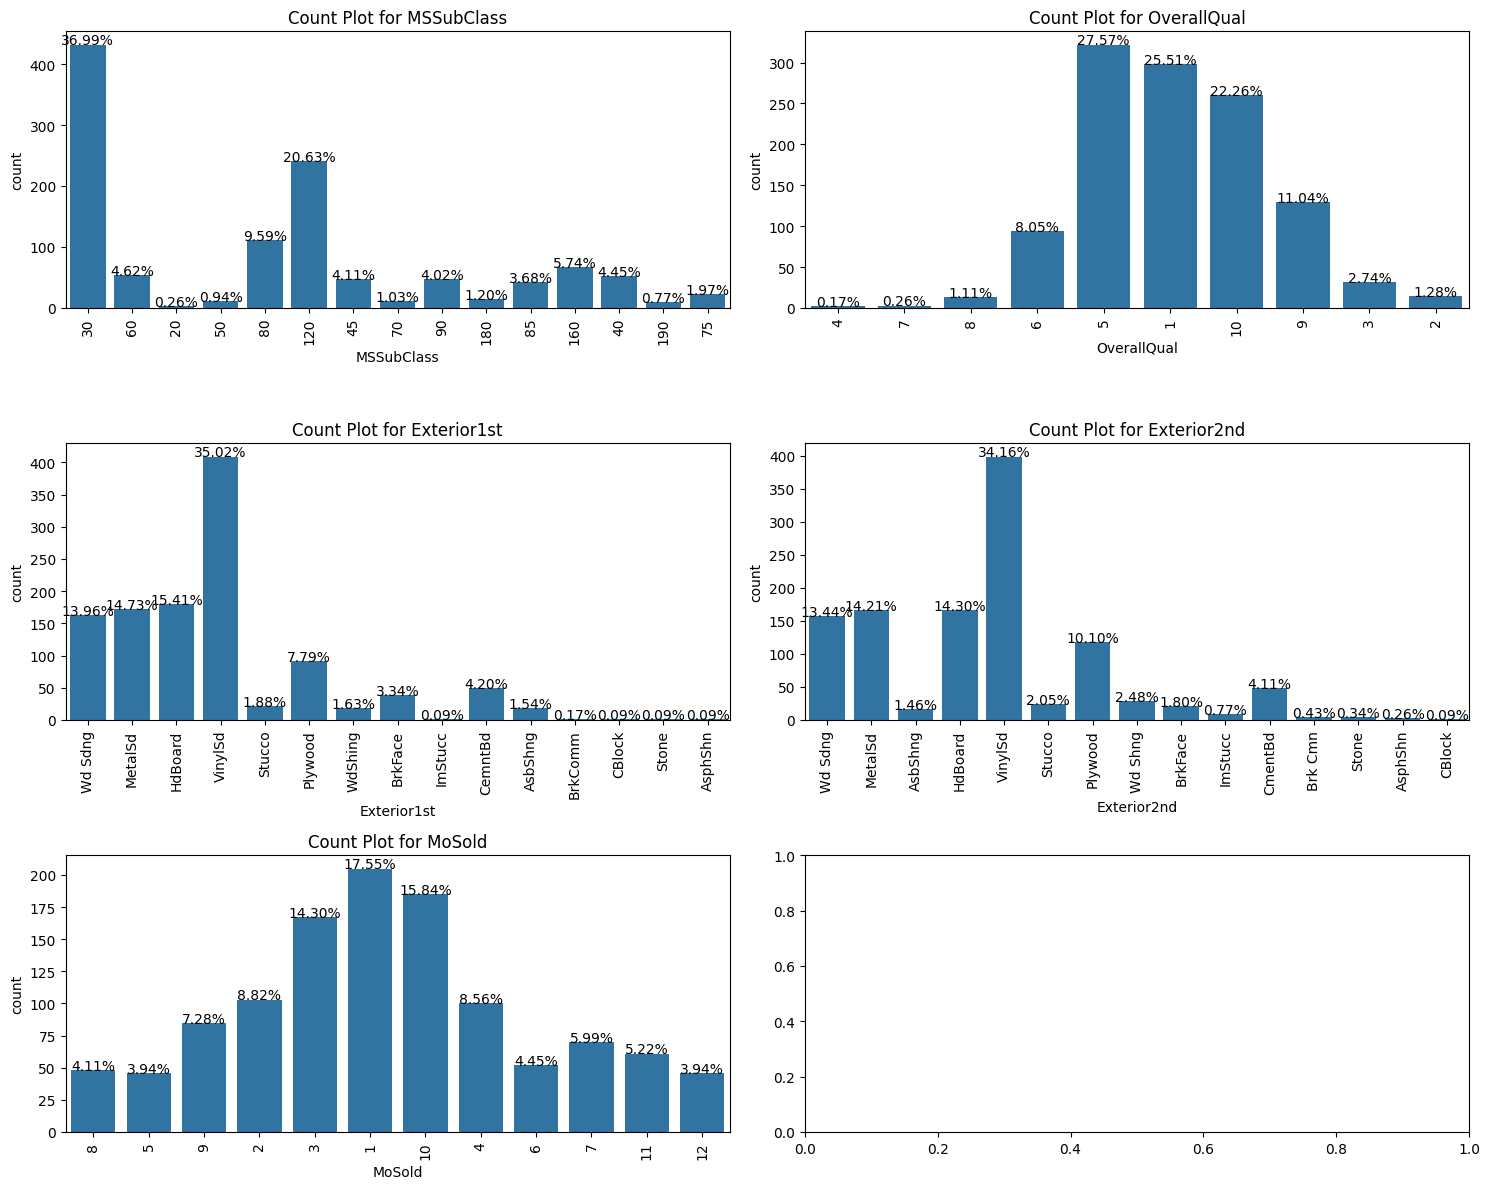

In [90]:
# Calculate percentage for each count
total_rows = len(grtten_df)
percentages = (grtten_df.value_counts() / total_rows) * 100

# Plot count plots with percentages
num_count_cols = len(grtten_df.columns)
fig, axs = plt.subplots(nrows=(num_count_cols + 1) // 2, ncols=2, figsize=(15, 4 * ((num_count_cols + 1) // 2)))

for i, col in enumerate(grtten_df.columns):
    ax = axs[i // 2, i % 2]
    sns.countplot(x=col, data=grtten_df, ax=ax)
    ax.set_title(f'Count Plot for {col}')
    ax.set_xticks(range(len(grtten_df[col].unique())))
    ax.set_xticklabels(grtten_df[col].unique(), rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height / total_rows * 100:.2f}%', ha='center')

plt.tight_layout()
plt.show()

# Transformation function

In [91]:
# Create a function to return the train and validation set
def ingest_and_split_train_val():
    df = pd.read_csv('dataset/train.csv', index_col='Id')
    
    train, val = train_test_split(
        df, test_size=0.2, 
        stratify=df['Neighborhood'], 
        shuffle=True, random_state=42)
    
    return train, val

In [92]:
# Test the function
train, val = ingest_and_split_train_val()
train.shape, val.shape

((1168, 80), (292, 80))

In [93]:
# Create a function to perform all the preporcessing on the dataset
def wrangle(df):
    # Numeric to categoricals
    cats = ["MSSubClass", "OverallCond", "OverallQual", "MoSold"]
    df[cats] = df[cats].astype(object)
    
    # Drop imbalanced columns
    df = df.drop(columns=[
         'Street', 'Utilities',
         'LandSlope', 'Condition2',
         'RoofMatl', 'Heating',
         'LowQualFinSF', 'KitchenAbvGr',
         'GarageQual', 'GarageCond',
         '3SsnPorch', 'PoolArea',
         'MiscVal'])

    # Add age columns
    df["Age"] = df["YrSold"] - df["YearBuilt"]
    df["RemodAddAge"] = df["YrSold"] - df["YearRemodAdd"]
    df["GrgAge"] = df["YrSold"] - df["GarageYrBlt"]

    # Drop year columns
    df = df.drop(columns=[
        'YearBuilt', 'YearRemodAdd', 
        'GarageYrBlt', 'YrSold'])

    # Drop the Half bath column
    df = df.drop(columns=["BsmtHalfBath"])

    # Drop cols with > 90% missing values
    df = df.drop(columns=[
        'Alley', 'LandContour',
        'CentralAir', 'Electrical',
        'Functional', 'PavedDrive',
        'PoolQC', 'MiscFeature'])

    return df

In [94]:
# Test the function
train.shape, val.shape
train = wrangle(train)
val = wrangle(val)
train.shape, val.shape

((1168, 80), (292, 80))

((1168, 57), (292, 57))

NOTE: 
The functions used to ingest and transform the dataset have been copied to [wrangle.py](wrangle.py) in the root folder so that can be imported and used for training